*Think Linear Algebra* is not for sale yet, but if you would like to support this project, you can [buy me a coffee](https://buymeacoffee.com/allendowney).

# A Day At the Track



[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ThinkLinearAlgebra/blob/main/nb/track.ipynb).

In [83]:
# temporary hack to make autoreload work on Colab
import importlib, sys
sys.modules["imp"] = importlib

%load_ext autoreload
%autoreload 2

In [12]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkLinearAlgebra/raw/main/utils.py")

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import decorate

In [84]:
from utils import set_precision

set_precision(4)

## Section



In [14]:
import pint

ureg = pint.UnitRegistry()

pace = 8 * ureg.minute / ureg.mile
pace

<Quantity(8.0, 'minute / mile')>

In [15]:
speed_mph = (1 / pace).to(ureg.mile / ureg.hour)
speed_mph

<Quantity(7.5, 'mile / hour')>

In [16]:
speed_mps = (1 / pace).to(ureg.meter / ureg.second)
speed_mps

<Quantity(3.3528, 'meter / second')>

In [17]:
straight = 84.39
circumference = 400 - (2 * straight)
circumference / 2

115.61

In [18]:
radius = circumference / 2 / np.pi
radius

36.799805941708044

In [19]:
from scipy.interpolate import interp1d

key_t = np.array([0, 2, 40])
key_v = np.array([0, 3.8, 3.2])

velocity_linear = interp1d(key_t, key_v, kind="linear", fill_value="extrapolate")

In [20]:
ts = np.arange(41)
vs = velocity_linear(ts)
np.mean(vs)

np.float64(3.3756097560975604)

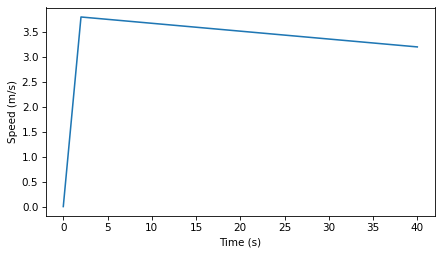

In [21]:
plt.plot(ts, vs)
decorate(xlabel="Time (s)", ylabel="Speed (m/s)")

In [22]:
ds = np.cumsum(vs)

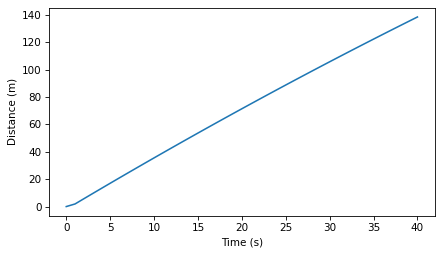

In [23]:
plt.plot(ts, ds)
decorate(xlabel="Time (s)", ylabel="Distance (m)")

In [24]:
ds[-1], circumference / 2

(np.float64(138.40000000000003), 115.61)

In [25]:
mask = ds < circumference / 2
ts = ts[mask]
ds = ds[mask]

In [26]:
thetas = ds / radius
thetas[-1]
thetas.shape

(33,)

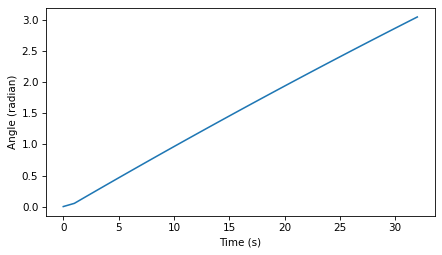

In [27]:
plt.plot(ts, thetas)
decorate(xlabel="Time (s)", ylabel="Angle (radian)")

In [28]:
def polar_to_cartesian(r, theta):
    """Convert polar coordinates (r, theta) to Cartesian (x, y)."""
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

In [30]:
xs, ys = polar_to_cartesian(radius, thetas)

In [31]:
position = np.column_stack([xs, ys])
position.shape

(33, 2)

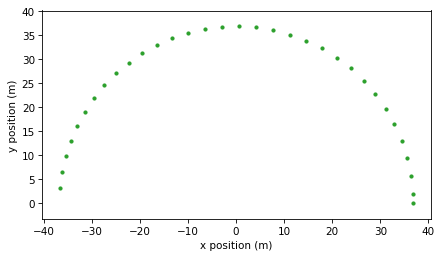

In [32]:
for vector in position:
    x, y = vector
    plt.plot(x, y, ".", color="C2")

plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

In [33]:
from utils import underride


def scatter(vectors, start=0, end=None, **options):
    underride(options, s=6)
    xs, ys = vectors[start:end].transpose()
    plt.scatter(xs, ys, **options)

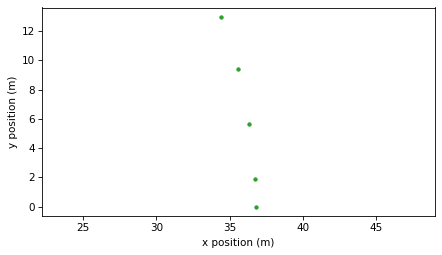

In [34]:
scatter(position, end=5, s=10, color="C2")
plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

In [35]:
def quiver(vectors, origin=None, start=0, end=None, **options):
    """Plot a set of vectors.

    vectors: list of vectors or array with one row per vector
    origin: list of vectors or array with one row per vector
    start: integer slice index
    end: integer slice index
    options: passed to plt.quiver
    """
    vectors = np.asarray(vectors)
    underride(
        options,
        angles="xy",
        scale_units="xy",
        scale=1,
        color="C0",
        alpha=0.6,
    )
    if origin is None:
        origin = np.zeros_like(vectors)
    else:
        origin = np.asarray(origin)

    us, vs = vectors[start:end].transpose()
    xs, ys = origin[start:end].transpose()

    plt.scatter(xs, ys, s=0)
    plt.scatter(xs + us, ys + vs, s=0)
    plt.quiver(xs, ys, us, vs, **options)

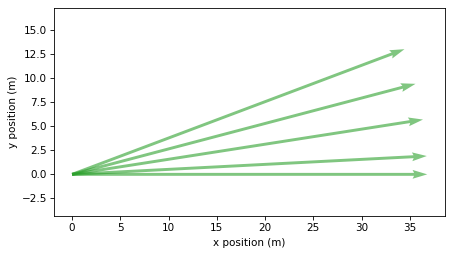

In [36]:
quiver(position, end=5, color="C2")
plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

In [37]:
dts = np.diff(ts)
velocity = np.diff(position, axis=0) / dts[:, None]
velocity.shape

(32, 2)

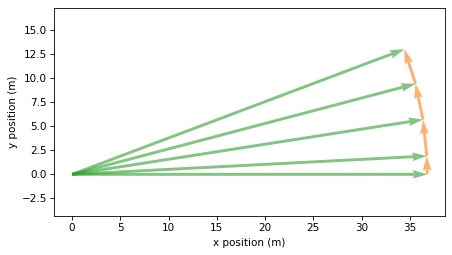

In [38]:
quiver(position, end=5, color="C2")
quiver(velocity, position, end=4, color="C1")
plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

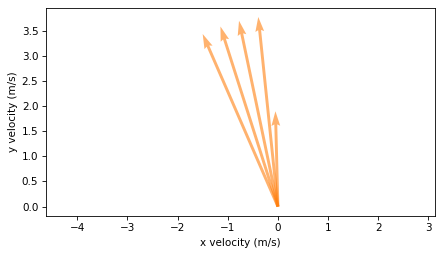

In [39]:
quiver(velocity, end=5, color="C1")
plt.axis("equal")
decorate(xlabel="x velocity (m/s)", ylabel="y velocity (m/s)")

In [40]:
from numpy.linalg import norm

speeds = [norm(vector) for vector in velocity]

In [41]:
speeds = norm(velocity, axis=1)
speeds.shape

(32,)

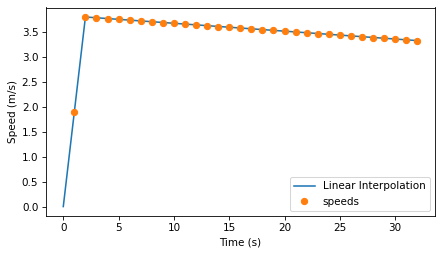

In [42]:
vs = velocity_linear(ts)
plt.plot(ts, vs, label="Linear Interpolation")
plt.plot(ts[:-1] + 1, speeds, "o", label="speeds")
decorate(xlabel="Time (s)", ylabel="Speed (m/s)")

In [43]:
acceleration = np.diff(velocity, axis=0) / dts[1:, None]

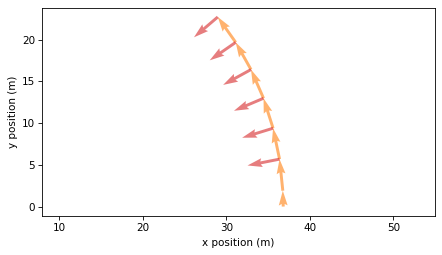

In [44]:
end = 7
quiver(velocity, position, end=end, color="C1")
quiver(acceleration * 10, position[1:], start=1, end=end, color="C3")
plt.axis("equal")
decorate(xlabel="x position (m)", ylabel="y position (m)")

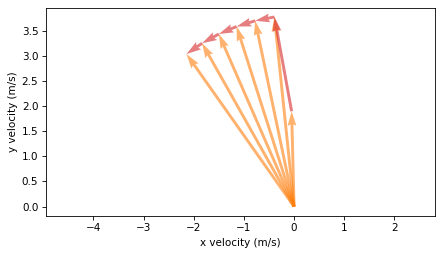

In [45]:
quiver(velocity, end=7, color="C1")
quiver(acceleration, velocity, end=6, color="C3")
plt.axis("equal")
decorate(xlabel="x velocity (m/s)", ylabel="y velocity (m/s)")

In [46]:
A = position[3]
C = position[4]
B = C - A

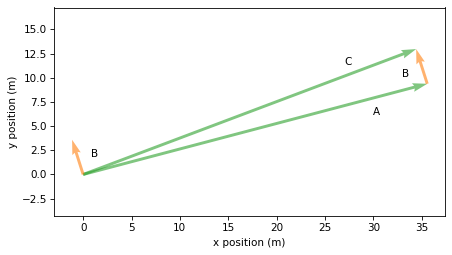

In [47]:
quiver([A, C], color="C2")
quiver([B], color="C1")
quiver([B], [A], color="C1")

plt.axis("equal")
plt.text(30, 6.2, "A")
plt.text(27, 11.3, "C")
plt.text(0.8, 1.8, "B")
plt.text(33, 10.1, "B")
decorate(xlabel="x position (m)", ylabel="y position (m)")

TODO: Multiply by dts

In [48]:
A = position[0]
C = position[-1]
D = np.sum(velocity, axis=0)

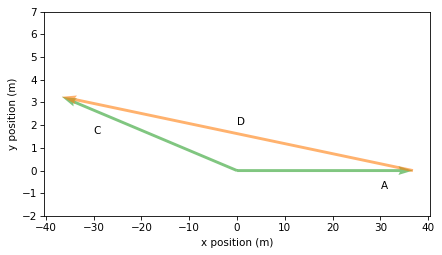

In [49]:
quiver([A, C], color="C2")
quiver([D], [A], color="C1")

plt.text(30, -0.8, "A")
plt.text(-30, 1.6, "C")
plt.text(0, 2, "D")
decorate(xlabel="x position (m)", ylabel="y position (m)", ylim=[-2, 7])

## GPS data

In [164]:
!ls *.gpx

Afternoon_Run.gpx  Morning_Run.gpx


In [166]:
from utils import clean_gpx

clean_gpx("Morning_Run.gpx", "morning_run.gpx")


✅ Clean GPX written to: morning_run.gpx


In [167]:
import pandas as pd
import gpxpy

# Path to your GPX file
filename = "morning_run.gpx"

# Parse GPX
with open(filename, "r") as f:
    gpx = gpxpy.parse(f)

records = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            records.append({
                "time": point.time,
                "latitude": point.latitude,
                "longitude": point.longitude,
                "elevation": point.elevation,
            })

df = pd.DataFrame(records)
df.shape

(464, 4)

In [168]:
df.head()

,time,latitude,longitude,elevation
0,2025-09-14 12:11:33+00:00,42.2815,-71.2408,50.9000
1,2025-09-14 12:11:34+00:00,42.2814,-71.2408,50.9000
2,2025-09-14 12:11:37+00:00,42.2814,-71.2409,50.9000
3,2025-09-14 12:11:39+00:00,42.2814,-71.2409,50.9000
4,2025-09-14 12:11:41+00:00,42.2814,-71.2410,50.9000


In [169]:
df['elevation'].describe()

count   464.0000
mean     46.5345
std       9.8069
min      27.3000
25%      38.8000
50%      48.9500
75%      54.8000
max      61.2000
Name: elevation, dtype: float64

In [170]:
from haversine import haversine, Unit

cols = ['latitude', 'longitude']
start = df.loc[0, cols]
end = df.loc[df.index[-1], cols]
haversine(start, end, unit=Unit.METERS)

5.2917

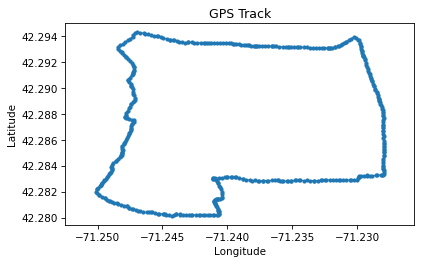

In [171]:

plt.plot(df["longitude"], df["latitude"], marker=".", lw=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("GPS Track")
plt.axis("equal");


In [172]:
def earth_radius(lat_deg):
    a = 6378137.0          # equatorial radius (m)
    b = 6356752.3142       # polar radius (m)
    lat = np.deg2rad(lat_deg)
    return np.sqrt(
        ((a**2 * np.cos(lat))**2 + (b**2 * np.sin(lat))**2) /
        ((a * np.cos(lat))**2 + (b * np.sin(lat))**2)
    )

lat = df['latitude'].mean()
R = earth_radius(lat)
lat, R

(42.2869, 6368500.2265)

In [173]:

def latlon_to_cartesian(lat_deg, lon_deg, radius=1.0):
    """
    Convert latitude and longitude (in degrees) to Cartesian coordinates.

    Parameters
    ----------
    lat_deg : array_like
        Geodetic latitude in degrees (north positive).
    lon_deg : array_like
        Longitude in degrees (east positive).
    radius : float or array_like, optional
        Radius of the sphere. Default is 1.0 for unit vectors.

    Returns
    -------
    xyz : ndarray of shape (N, 3)
        Cartesian coordinates [x, y, z] in an Earth-centered, Earth-fixed frame.

    Notes
    -----
    - The coordinate frame is right-handed:
        +x → (lat=0°, lon=0°)
        +y → (lat=0°, lon=90°E)
        +z → (North Pole)
    - This is the standard spherical-to-Cartesian conversion used for
      geocentric coordinates (no ellipsoid flattening applied).
    """
    lat = np.deg2rad(lat_deg)
    lon = np.deg2rad(lon_deg)

    x = np.cos(lat) * np.cos(lon)
    y = np.cos(lat) * np.sin(lon)
    z = np.sin(lat)

    return radius[:, None] * np.column_stack((x, y, z))

In [174]:
lat, lon, elev = df[["latitude", "longitude", "elevation"]].values.T
R + elev

array([6368551.1265, 6368551.1265, 6368551.1265, 6368551.1265,
       6368551.1265, 6368551.1265, 6368551.1265, 6368551.1265,
       6368551.1265, 6368551.2265, 6368551.2265, 6368551.2265,
       6368551.2265, 6368551.1265, 6368551.1265, 6368551.1265,
       6368551.0265, 6368551.0265, 6368551.0265, 6368550.9265,
       6368550.8265, 6368550.8265, 6368550.8265, 6368550.8265,
       6368550.8265, 6368550.9265, 6368550.9265, 6368550.8265,
       6368550.8265, 6368550.6265, 6368550.6265, 6368550.5265,
       6368550.3265, 6368550.3265, 6368550.2265, 6368550.0265,
       6368549.7265, 6368549.3265, 6368549.2265, 6368548.6265,
       6368548.5265, 6368548.1265, 6368547.4265, 6368546.5265,
       6368545.8265, 6368545.3265, 6368545.1265, 6368544.9265,
       6368544.4265, 6368544.2265, 6368543.9265, 6368543.6265,
       6368543.5265, 6368543.3265, 6368543.1265, 6368543.0265,
       6368542.7265, 6368542.6265, 6368542.4265, 6368542.1265,
       6368542.1265, 6368541.7265, 6368541.7265, 636854

In [175]:
r = latlon_to_cartesian(lat, lon, R + elev)

In [176]:
r0 = r.mean(axis=0)
r0

array([ 1515244.4109, -4461041.7769,  4285035.3322])

In [177]:
from utils import norm, normalize

r_hat = normalize(r0)
r_hat

array([ 0.2379, -0.7005,  0.6728])

In [178]:
# local basis via vector operations
z_hat = np.array([0, 0, 1])
e = np.cross(z_hat, r0)
e_hat = normalize(e)
norm(e_hat)

1.0000

In [179]:
n_hat = np.cross(r_hat, e_hat)
norm(n_hat)

1.0000

In [218]:
import numpy as np

def draw_globe(ax, R=3.0, n_lat=9, n_lon=12, alpha=0.3):
    """Draw a globe of radius R with lines of latitude and longitude.
    """
    # ---- base surface ----
    lat_grid = np.linspace(-90, 90, 60)
    lon_grid = np.linspace(-180, 180, 120)
    lat, lon = np.meshgrid(lat_grid, lon_grid)
    xyz = latlon_to_cartesian(lat.ravel(), lon.ravel(), radius=np.full(lat.size, R))
    X, Y, Z = [a.reshape(lat.shape) for a in xyz.T]
    ax.plot_surface(X, Y, Z, color='C0', alpha=0.04, linewidth=0)

    # ---- latitude circles ----
    lats = np.linspace(-60, 60, n_lat)
    lons = np.linspace(-180, 180, 361)
    for lat in lats:
        xyz = latlon_to_cartesian(np.full_like(lons, lat), lons, radius=np.full_like(lons, R))
        ax.plot(*xyz.T, color='k', linewidth=0.5, alpha=alpha)

    # ---- longitude lines ----
    lons = np.linspace(-180, 180, n_lon, endpoint=False)
    lats = np.linspace(-90, 90, 181)
    for lon in lons:
        xyz = latlon_to_cartesian(lats, np.full_like(lats, lon), radius=np.full_like(lats, R))
        ax.plot(*xyz.T, color='k', linewidth=0.5, alpha=alpha)


In [223]:
from utils import setup_3D


def globe_diagram(R):
    fig, [ax] = setup_3D(show_grid=False)
    ax.view_init(elev=20, azim=-45, roll=0)

    draw_globe(ax, R)

    lim = [-6, 6]
    decorate(xlim=lim, ylim=lim, zlim=lim, 
             xlabel='i', ylabel='j', zlabel='k', 
             aspect='equal')

In [224]:
r0_scaled = r0 / 1e6
R_scaled = norm(r0_scaled)
z_scaled = z_hat * R_scaled

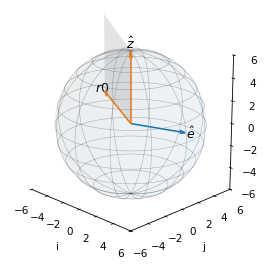

In [225]:
from utils import plot_vector_3D, plot_vectors_3D, label_vectors_3D, plot_plane

globe_diagram(R_scaled)

plot_vector_3D(r0_scaled, label='$r0$', color='C1', alpha=1)

plot_vector_3D(z_scaled, label='$\hat{z}$', color='C1', alpha=1)

plot_plane(r0_scaled, z_scaled, alpha=0.2)

plot_vector_3D(e_hat, label='$\hat{e}$', scale=5, alpha=1)

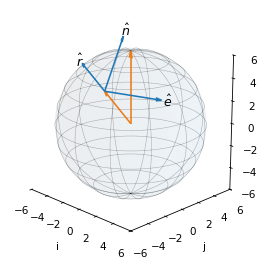

In [226]:
globe_diagram(R_scaled)

plot_vectors_3D([r0_scaled, z_scaled], color='C1', alpha=1)

origins = [r0_scaled] * 3
plot_vectors_3D([r_hat, e_hat, n_hat], origins, scale=5, alpha=1)
label_vectors_3D(['$\hat{r}$', '$\hat{e}$', '$\hat{n}$'], 
                 [r_hat, e_hat, n_hat], origins, scale=5)

In [227]:
# projection matrix
T = np.column_stack([e_hat, n_hat, r0])

# local coords (in meters)
d = r - r0
enr = d @ T
df["east_m"], df["north_m"], df["up_m"] = enr.T

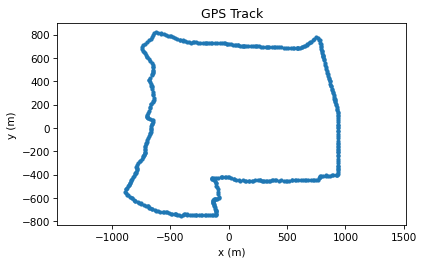

In [183]:
plt.plot(df["east_m"], df["north_m"], marker=".", lw=0)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("GPS Track")
plt.axis("equal");

In [69]:
cols = ["east_m", "north_m"]
start = df.loc[0, cols]
end = df.loc[df.index[-1], cols]
v = end - start
np.linalg.norm(v)

np.float64(1069.3759222100725)

[Think Linear Algebra](https://allendowney.github.io/ThinkLinearAlgebra/index.html)

Copyright 2025 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)